# Modelo Encoder

In [14]:
#Variable 
import matplotlib.pyplot as plt

import pickle
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow.keras as keras
from keras import layers
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import sys
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from tensorflow.python.ops.variables import trainable_variables

from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from tensorflow.python.ops.variables import trainable_variables
from sklearn.model_selection import train_test_split

CATEGORIES = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","nn","o","p","q","r","s","t","u","v","w","x","y","z"]

# Cargar datos

In [2]:
#cargando data
pickle_in = open("Xfusion","rb")
X = pickle.load(pickle_in)
pickle_in = open("yfusion","rb")
y = pickle.load(pickle_in)

X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.33, shuffle = True)



In [3]:
height, width, depth = 60, 60, 1 # MNIST images are 28x28
num_classes = 27 # there are 10 classes (1 per digit)
num_train = 32495
num_test = 16006

X_train = X_train.reshape(num_train, height * width)
X_test = X_test.reshape(num_test, height * width)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range


Y_train = np_utils.to_categorical(Y_train, num_classes) # One-hot encode the labels
Y_test2 = Y_test
Y_test = np_utils.to_categorical(Y_test, num_classes) # One-hot encode the labels


# Creacion del modelo

In [38]:
#Definir capas, creacion y entrenamiento del modelo
input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img)

encoded = Dense(1600, activation='relu')(x)
encoder = Model(input_img, encoded) 


In [6]:
out2 = Dense(num_classes, activation='softmax')(encoder.output)
newmodel = Model(encoder.input,out2)

newmodel.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 


history = newmodel.fit(X_train, Y_train,
      epochs=10,
      batch_size=32,
      shuffle=True,
      validation_data=(X_test, Y_test))

scores = newmodel.evaluate(X_test, Y_test, verbose=1) 
print("Accuracy: ", scores[1])
 
 

Epoch 1/10
1016/1016 [==============================] - 102s 100ms/step - loss: 1.9378 - accuracy: 0.3513 - val_loss: 1.3604 - val_accuracy: 0.4847
Epoch 2/10
1016/1016 [==============================] - 101s 99ms/step - loss: 1.1341 - accuracy: 0.5768 - val_loss: 0.9458 - val_accuracy: 0.6374
Epoch 3/10
1016/1016 [==============================] - 86s 85ms/step - loss: 0.8528 - accuracy: 0.6823 - val_loss: 0.7284 - val_accuracy: 0.7328
Epoch 4/10
1016/1016 [==============================] - 81s 80ms/step - loss: 0.6970 - accuracy: 0.7410 - val_loss: 0.6840 - val_accuracy: 0.7416
Epoch 5/10
1016/1016 [==============================] - 81s 80ms/step - loss: 0.5779 - accuracy: 0.7858 - val_loss: 0.6069 - val_accuracy: 0.7798
Epoch 6/10
1016/1016 [==============================] - 83s 82ms/step - loss: 0.4960 - accuracy: 0.8162 - val_loss: 0.6189 - val_accuracy: 0.7826
Epoch 7/10
1016/1016 [==============================] - 96s 94ms/step - loss: 0.4385 - accuracy: 0.8399 - val_loss: 0.436

In [16]:
#Modelo Encoder
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3600)]            0         
                                                                 
 dense (Dense)               (None, 3600)              12963600  
                                                                 
 dense_1 (Dense)             (None, 1600)              5761600   
                                                                 
Total params: 18,725,200
Trainable params: 18,725,200
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Modelo Encoder mas capa de clasificacion
newmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3600)]            0         
                                                                 
 dense (Dense)               (None, 3600)              12963600  
                                                                 
 dense_1 (Dense)             (None, 1600)              5761600   
                                                                 
 dense_3 (Dense)             (None, 27)                43227     
                                                                 
Total params: 18,768,427
Trainable params: 18,768,427
Non-trainable params: 0
_________________________________________________________________


# Ejemplo de prediccion

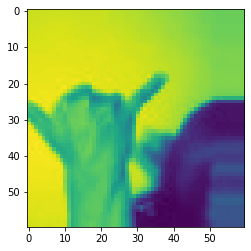

In [10]:
numero = 8
plt.imshow(X_test[numero].reshape(60, 60))

In [39]:
ress = newmodel.predict(X_test)
reduced_representation = encoder.predict(X_test)

In [15]:
#Prediccion del modelo
print("La seña es:", CATEGORIES[np.argmax(ress[numero])])

La seña es: y


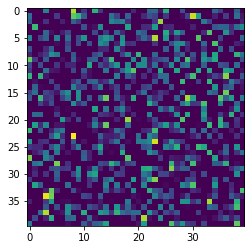

In [40]:
#Representacion reducida
plt.imshow(reduced_representation[numero].reshape(40, 40))

# Graficos y matriz de confusion

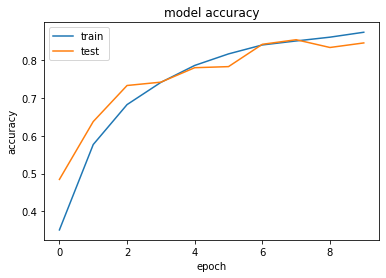

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

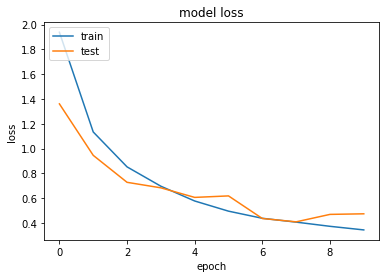

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
prediccionTest =  np.argmax(newmodel.predict(X_test),  axis=1)

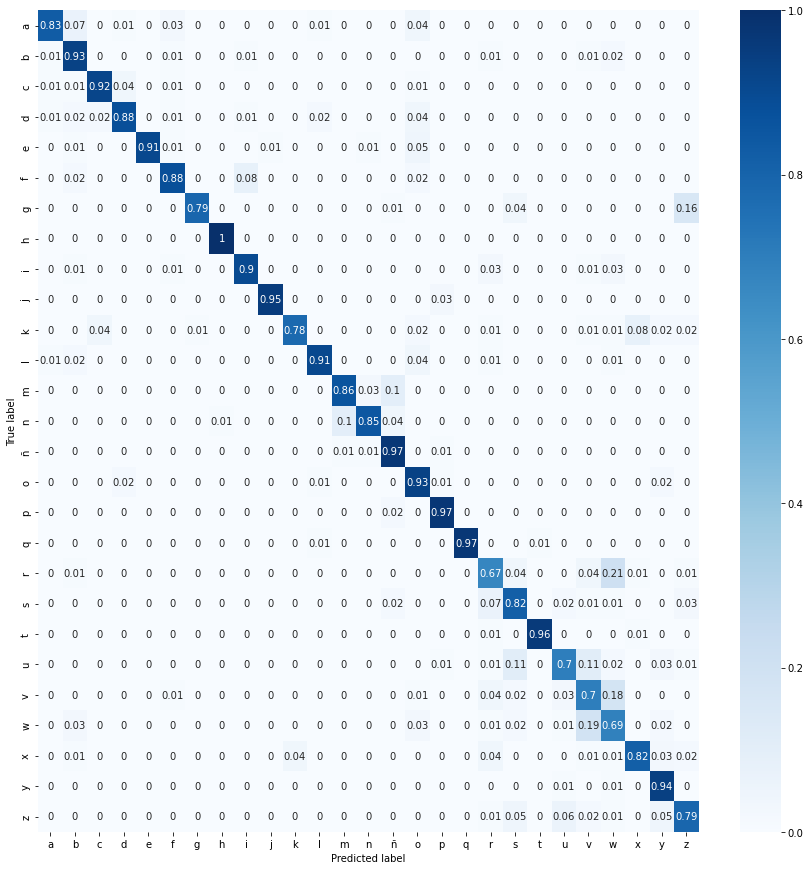

In [22]:

import pathlib

import seaborn as sns
import tensorflow as tf
import pandas as pd                     

from IPython import display

classes=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","ñ","o","p","q","r","s","t","u","v","w","x","y","z"]
con_mat = tf.math.confusion_matrix(labels=Y_test2, predictions=prediccionTest).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(12, 12))

sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()